# HW2 - Plotting with `matplotlib`

**Spring 2020 | Python for Neuroscientists**


This HW will focus on plotting with the `matplotlib` library. We will use the coronavirus data, which can be downloaded as a csv file from the following Johns Hopkins University website. The data is updated daily here:

https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

This data is simply cumulative confirmed cases for each country.

In [1]:
# pandas 
import pandas as pd

# matplotlib
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns



## Load the csv file

Make sure that the csv file and the .ipynb are in the same directory

In [2]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv') # this is pandas function

This loads a table, or pandas "dataframe." We will use pandas to extract data from the table. We can look at the contents of the table:

In [3]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,444,484,521,555,607,665,714,784,840,906
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,400,409,416,433,446,467,475,494,518,539
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,564,583,601,601,638,646,659,673,673,696
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,19,19,19,21,21,23,23,23,23,23
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,1715,1795,1975,1975,2142,2208,2277,2443,2571,2669
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,881,921,937,967,1013,1039,1067,1111,1159,1201
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,99,100,103,103,103,102,103,103,103,103
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,2734,2773,2822,2857,2857,2863,2870,2886,2897,2926


Let's look at the stats for Italy

In [4]:
df_italy = df[df['Country/Region'] == 'Italy'] # this is one way to select Italy from the dataframe
df_italy.head() # this displays the 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
137,NaN,Italy,43.0,12.0,0,0,0,0,0,0,...,139422,143626,147577,152271,156363,159516,162488,165155,168941,172434


In [5]:
df_italy1 = df_italy.set_index('Country/Region', drop = True) # set pandas dataframe index to country
df_italy2 = df_italy1.drop(columns=['Lat','Long','Province/State'])

data_italy = df_italy2.loc['Italy','2/20/20':'4/13/20'] # select dates through April 5, 2020

Note that it would be cleaner to write the following:
> `df_italy = df_italy.set_index('Country/Region', drop = True)`

> `df_italy = df_italy.drop(columns=['Lat','Long','Province/State'])`

> `data_italy = df_italy.loc['Italy','2/20/20':'4/5/20']`

# Part 1: Plot the Data from Italy

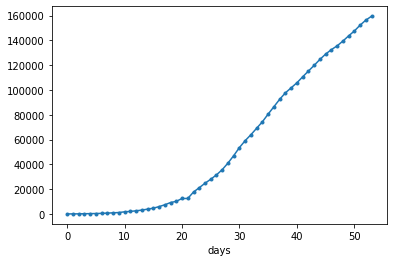

In [6]:
plt.plot(data_italy.values,'.-')
plt.xlabel('days')
plt.show()

## 1a Change the color of the line

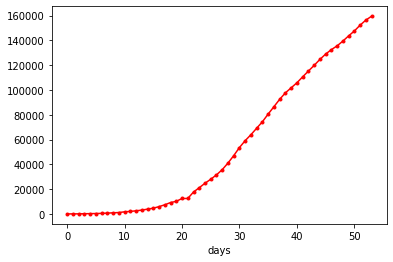

In [7]:
plt.plot(data_italy.values,'.-',color='r')
plt.xlabel('days')
plt.show()

## 1b Change the thickness of the line

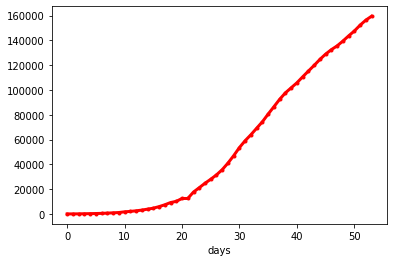

In [8]:
plt.plot(data_italy.values,'.-',color='r',linewidth=3)
plt.xlabel('days')
plt.show()

## 1c Add a label the y-axis

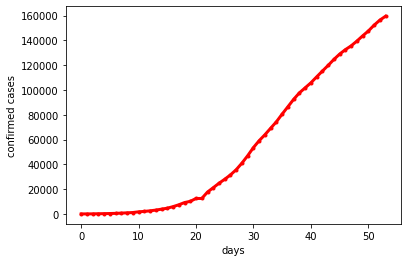

In [9]:
plt.plot(data_italy.values,'.-',color='r',linewidth=3)
plt.xlabel('days')
plt.ylabel('confirmed cases')
plt.show()

## 1d Add a title

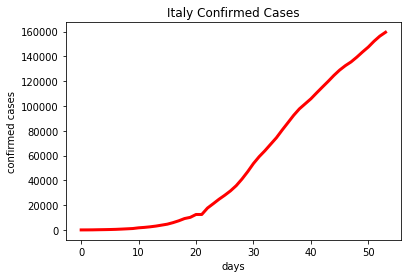

In [10]:
plt.plot(data_italy.values,'-',color='r',linewidth=3)
plt.xlabel('days')
plt.ylabel('confirmed cases')
plt.title('Italy Confirmed Cases')
plt.show()

## 1e Resize the figure
Note that we can plot with the calendar date using `data_italy.index`

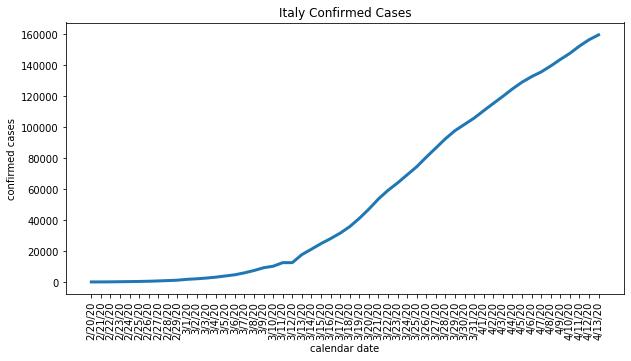

In [11]:

# resize this figure here
fig = plt.figure(figsize=(10,5))

plt.plot(data_italy.index,data_italy.values,'-',linewidth=3)
plt.xticks(rotation=90) # rotate the xticks so text is not so tight
plt.xlabel('calendar date')
plt.ylabel('confirmed cases')
plt.title('Italy Confirmed Cases')
plt.show()

## Part 2: Plotting US and Italy Data

We can extract the data for the US from the dataframe

In [12]:
df_us = df[df['Country/Region'] == 'US']
df_us = df_us.set_index('Country/Region', drop = True) # set pandas dataframe index to country
df_us = df_us.drop(columns=['Lat','Long','Province/State'])

data_us = df_us.loc['US','2/28/20':'4/13/20']

## 2a: Plot Italy and US data in two axes

Use subplots and assign separate colors to each country. Set the same limits on the y-axis for both subplots

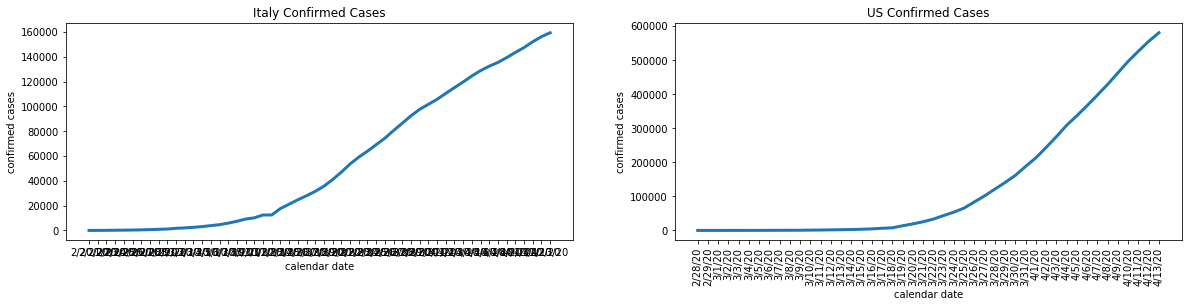

In [13]:
# use 
fig,ax = plt.subplots(1,2,figsize=(20,4)) # or whatever dimensions you like

ax[0].plot(data_italy.index,data_italy.values,'-',linewidth=3)
ax[1].plot(data_us.index,data_us.values,'-',linewidth=3)

ax[0].set_title('Italy Confirmed Cases')
ax[1].set_title('US Confirmed Cases')

for a in ax:
   
    a.set_xlabel('calendar date')
    a.set_ylabel('confirmed cases')
    plt.xticks(rotation=90) # rotate the xticks so text is not so tight << this is tricky

    
plt.show()

## 2b: Plot Italy and US data in the same plot

Use the same colors as above, and include a legend

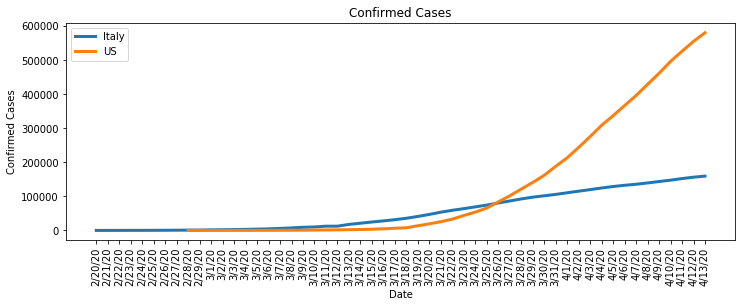

In [15]:
fig,ax = plt.subplots(1,1,figsize=(12,4)) # or whatever dimensions you like

ax.plot(data_italy.index,data_italy.values,'-',linewidth=3,label='Italy')
ax.plot(data_us.index,data_us.values,'-',linewidth=3,label='US')

ax.set_title('Confirmed Cases')
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
plt.xticks(rotation=90)
plt.legend()
plt.show()


## 2c Plot Italy and US data on log axis

Note that we only want the y-axis to be logarithmic

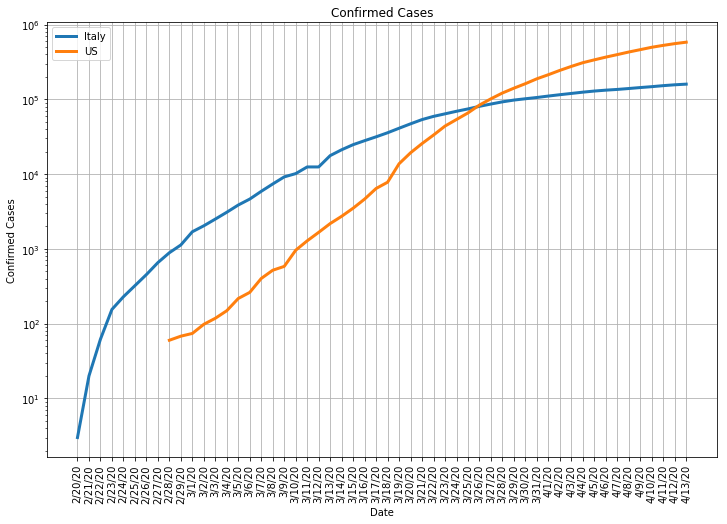

In [16]:
fig,ax = plt.subplots(1,1,figsize=(12,8)) # or whatever dimensions you like

ax.plot(data_italy.index,data_italy.values,'-',linewidth=3,label='Italy')
ax.plot(data_us.index,data_us.values,'-',linewidth=3,label='US')

ax.set_title('Confirmed Cases')
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
plt.xticks(rotation=90)
plt.yscale('log')
plt.grid(which='major')
plt.legend()
plt.show()

## 2d Make the same plot as above, but using a `for` loop

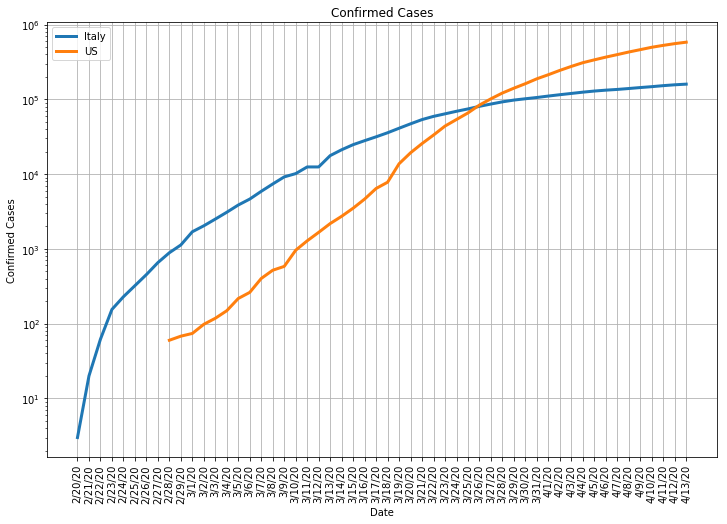

In [17]:
data_list = [data_italy,data_us]
data_names = ['Italy','US']

fig,ax = plt.subplots(1,1,figsize=(12,8)) # or whatever dimensions you like

for data,name in zip(data_list,data_names):
    ax.plot(data.index,data.values,'-',linewidth=3,label=name)

ax.set_title('Confirmed Cases')
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
plt.xticks(rotation=90)
plt.yscale('log')
plt.grid(which='major')
plt.legend()
plt.show()

## Part 3 Plot Data for 5 countries

Use a for loop, and include x/y labels and a legend. Also save your figure as a jpg and share with friends. You are now a Python datascientist

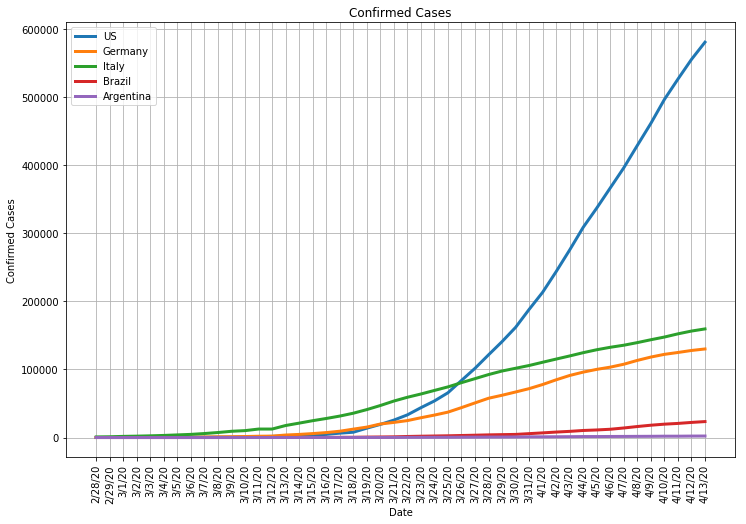

In [18]:



country_names = ['US', 'Germany','Italy','Brazil','Argentina']

fig,ax = plt.subplots(1,1,figsize=(12,8)) # or whatever dimensions you like

for name in country_names:
    
    df_t = df[df['Country/Region'] == name]
    df_t = df_t.set_index('Country/Region', drop = True) # set pandas dataframe index to country
    df_t = df_t.drop(columns=['Lat','Long','Province/State'])

    data = df_t.loc[name,'2/28/20':'4/13/20']


    
    ax.plot(data.index,data.values,'-',linewidth=3,label=name)

ax.set_title('Confirmed Cases')
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
plt.xticks(rotation=90)
#plt.yscale('log')
plt.grid(which='major')
plt.legend()
plt.show()

# save your figure
# fig.savefig('myplot.jpg')

## Bonus: Seaborn

Plot whatever you like using seaborn

In [19]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,299,349,367,423,444,484,521,555,607,665
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333,361,377,383,400,409,416,433,446,467
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,466,501,525,545,564,583,601,601,638,646
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,10,14,16,17,19,19,19,19,19,19
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,15,15,15,19,19,19,19,21,21,23
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,1451,1451,1554,1628,1715,1795,1975,1975,2142,2208
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,770,822,833,853,881,921,937,967,1013,1039
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,93,96,96,96,99,100,103,103,103,102
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,2493,2580,2637,2686,2734,2773,2822,2857,2857,2863


In [36]:
df_t = df[df['Country/Region'] == 'Germany']
df_t

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
120,NaN,Germany,51.0,9.0,0,0,0,0,0,1,...,96092,100123,103374,107663,113296,118181,122171,124908,127854,130072


In [20]:
df_t = df[df['Country/Region'] == 'France']

In [21]:
df_t

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
107,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,61,61,72,72,77,83,83,83,86,86
108,French Polynesia,France,-17.6797,149.4068,0,0,0,0,0,0,...,40,41,42,47,51,51,51,51,53,55
109,Guadeloupe,France,16.2500,-61.5833,0,0,0,0,0,0,...,134,135,135,139,141,141,143,143,143,143
110,Mayotte,France,-12.8275,45.1662,0,0,0,0,0,0,...,134,147,147,171,171,184,191,196,196,207
111,New Caledonia,France,-20.9043,165.6180,0,0,0,0,0,0,...,17,18,18,18,18,18,18,18,18,18
112,Reunion,France,-21.1351,55.2471,0,0,0,0,0,0,...,334,344,349,358,358,362,382,388,389,391
113,Saint Barthelemy,France,17.9000,-62.8333,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
114,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,24,32,32,32,32,32,32,32,32,32
115,Martinique,France,14.6415,-61.0242,0,0,0,0,0,0,...,145,149,151,152,154,154,155,155,155,157
116,NaN,France,46.2276,2.2137,0,0,2,3,3,3,...,89953,92839,98010,109069,112950,117749,124869,129654,132591,136779


In [22]:
france_all = df_t.sum()

In [23]:
france_all

Lat            91.3624
Long           59.7192
1/22/20         0.0000
1/23/20         0.0000
1/24/20         2.0000
1/25/20         3.0000
1/26/20         3.0000
1/27/20         3.0000
1/28/20         4.0000
1/29/20         5.0000
1/30/20         5.0000
1/31/20         5.0000
2/1/20          6.0000
2/2/20          6.0000
2/3/20          6.0000
2/4/20          6.0000
2/5/20          6.0000
2/6/20          6.0000
2/7/20          6.0000
2/8/20         11.0000
2/9/20         11.0000
2/10/20        11.0000
2/11/20        11.0000
2/12/20        11.0000
2/13/20        11.0000
2/14/20        11.0000
2/15/20        12.0000
2/16/20        12.0000
2/17/20        12.0000
2/18/20        12.0000
              ...     
3/15/20      4532.0000
3/16/20      6683.0000
3/17/20      7715.0000
3/18/20      9124.0000
3/19/20     10970.0000
3/20/20     12758.0000
3/21/20     14463.0000
3/22/20     16243.0000
3/23/20     20123.0000
3/24/20     22622.0000
3/25/20     25600.0000
3/26/20     29551.0000
3/27/20    

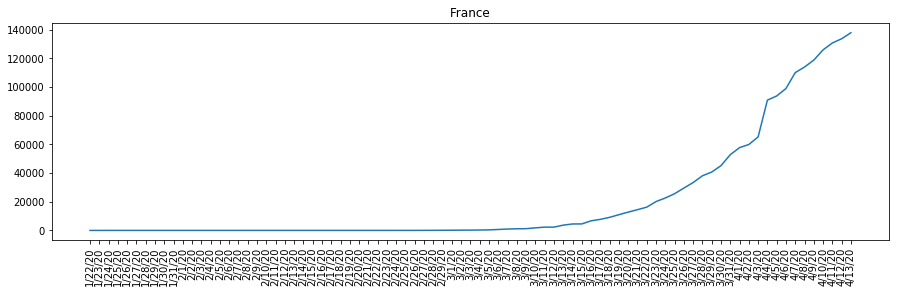

In [35]:
data = france_all['1/22/20':'4/13/20']

fig = plt.figure(figsize=(15,4))
plt.plot(data)
plt.xticks(rotation=90)
plt.title('France')
plt.show()